# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 629


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
            
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
                
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        max_temp = city_weather["main"]["temp_max"]
        city_max_temp = (max_temp - 273.15) * 1.8 + 32
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(city_weather["dt"]))
                
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | oruro
Processing Record 2 of Set 1 | kharkhorin
Processing Record 3 of Set 1 | acapulco de juarez
Processing Record 4 of Set 1 | cambria
Processing Record 5 of Set 1 | cacequi
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | sangmelima
Processing Record 9 of Set 1 | papatowai
Processing Record 10 of Set 1 | murzuq
Processing Record 11 of Set 1 | mejit
Processing Record 12 of Set 1 | sosnovo-ozerskoye
Processing Record 13 of Set 1 | queenstown
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | lapaha
City not found. Skipping...
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | klyuchi
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | tralee
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1 | margaret river
P

Processing Record 35 of Set 4 | palangkaraya
Processing Record 36 of Set 4 | korhogo
Processing Record 37 of Set 4 | kizhinga
Processing Record 38 of Set 4 | bonny
Processing Record 39 of Set 4 | srikakulam
Processing Record 40 of Set 4 | balkanabat
Processing Record 41 of Set 4 | vilyuchinsk
Processing Record 42 of Set 4 | sanctuary point
Processing Record 43 of Set 4 | madalena
Processing Record 44 of Set 4 | west island
Processing Record 45 of Set 4 | mokolo
Processing Record 46 of Set 4 | newman
Processing Record 47 of Set 4 | lompoc
Processing Record 48 of Set 4 | sao vicente
Processing Record 49 of Set 4 | maumere
Processing Record 0 of Set 5 | nova sintra
Processing Record 1 of Set 5 | bam
Processing Record 2 of Set 5 | ust-nera
Processing Record 3 of Set 5 | dunedin
Processing Record 4 of Set 5 | port alfred
Processing Record 5 of Set 5 | pangody
Processing Record 6 of Set 5 | fort st. john
Processing Record 7 of Set 5 | yeniseysk
Processing Record 8 of Set 5 | arti
Processing 

Processing Record 25 of Set 8 | ipala
Processing Record 26 of Set 8 | bandarbeyla
Processing Record 27 of Set 8 | arraial do cabo
Processing Record 28 of Set 8 | margate
Processing Record 29 of Set 8 | kultali
City not found. Skipping...
Processing Record 30 of Set 8 | hampton bays
Processing Record 31 of Set 8 | fisterra
Processing Record 32 of Set 8 | broome
Processing Record 33 of Set 8 | shiwan
Processing Record 34 of Set 8 | skovorodino
Processing Record 35 of Set 8 | carnarvon
Processing Record 36 of Set 8 | ahfir
Processing Record 37 of Set 8 | kirensk
Processing Record 38 of Set 8 | uvinza
Processing Record 39 of Set 8 | samarinda
Processing Record 40 of Set 8 | puerto colombia
Processing Record 41 of Set 8 | hadibu
Processing Record 42 of Set 8 | iwon-up
Processing Record 43 of Set 8 | port washington
Processing Record 44 of Set 8 | jinzhou
Processing Record 45 of Set 8 | hakui
Processing Record 46 of Set 8 | ust'-kut
Processing Record 47 of Set 8 | tughyl
Processing Record 48

Processing Record 19 of Set 12 | colonia
Processing Record 20 of Set 12 | kayangel
Processing Record 21 of Set 12 | ulsteinvik
Processing Record 22 of Set 12 | mount pleasant
Processing Record 23 of Set 12 | buloh kasap
Processing Record 24 of Set 12 | zhangatas
Processing Record 25 of Set 12 | dalandzadgad
Processing Record 26 of Set 12 | sandnessjoen
Processing Record 27 of Set 12 | coahuayana de hidalgo
Processing Record 28 of Set 12 | atsugi
Processing Record 29 of Set 12 | zayed city
Processing Record 30 of Set 12 | fray luis beltran
Processing Record 31 of Set 12 | kimbe
Processing Record 32 of Set 12 | carutapera
Processing Record 33 of Set 12 | villa alberto andres alvarado aramburo
City not found. Skipping...
Processing Record 34 of Set 12 | carazinho
Processing Record 35 of Set 12 | ouezzane
Processing Record 36 of Set 12 | cill airne
Processing Record 37 of Set 12 | mathba
Processing Record 38 of Set 12 | carloforte
Processing Record 39 of Set 12 | haimen
Processing Record 4

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          599
Lat           599
Lng           599
Max Temp      599
Humidity      599
Cloudiness    599
Wind Speed    599
Country       599
Date          599
dtype: int64

In [5]:
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,oruro,-17.9833,-67.1500,62.510,12,0,2.13,BO,2023-04-22 13:06:42
1,kharkhorin,47.1975,102.8238,28.220,28,4,1.79,MN,2023-04-22 13:06:43
2,acapulco de juarez,16.8634,-99.8901,85.820,66,75,3.09,MX,2023-04-22 13:06:33
3,cambria,35.5641,-121.0808,74.426,65,98,3.43,US,2023-04-22 13:06:43
4,cacequi,-29.8836,-54.8250,79.466,32,90,2.37,BR,2023-04-22 13:03:05


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,oruro,-17.9833,-67.1500,62.510,12,0,2.13,BO,2023-04-22 13:06:42
1,kharkhorin,47.1975,102.8238,28.220,28,4,1.79,MN,2023-04-22 13:06:43
2,acapulco de juarez,16.8634,-99.8901,85.820,66,75,3.09,MX,2023-04-22 13:06:33
3,cambria,35.5641,-121.0808,74.426,65,98,3.43,US,2023-04-22 13:06:43
4,cacequi,-29.8836,-54.8250,79.466,32,90,2.37,BR,2023-04-22 13:03:05


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

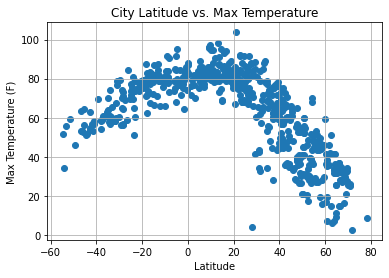

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

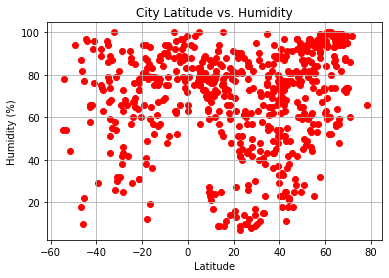

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color="red", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

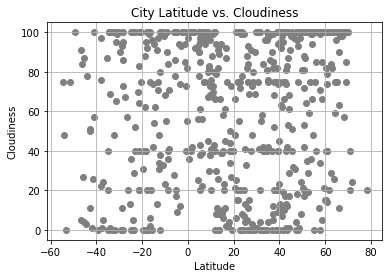

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color="grey", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

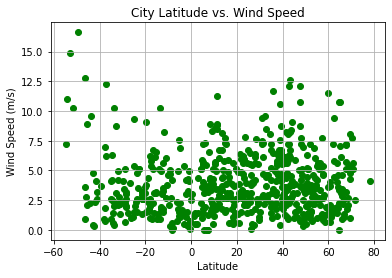

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color="green", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [37]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression line values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot and regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    
    # Add line equation to plot
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    
    # Add title and axis labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Print r-squared value
    print(f"The r-squared value is: {rvalue**2}")
    
    # Show plot
    plt.show()

In [38]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kharkhorin,47.1975,102.8238,28.220,28,4,1.79,MN,2023-04-22 13:06:43
2,acapulco de juarez,16.8634,-99.8901,85.820,66,75,3.09,MX,2023-04-22 13:06:33
3,cambria,35.5641,-121.0808,74.426,65,98,3.43,US,2023-04-22 13:06:43
5,albany,42.6001,-73.9662,66.884,63,100,2.24,US,2023-04-22 13:00:08
7,sangmelima,2.9333,11.9833,70.160,98,92,1.42,CM,2023-04-22 13:06:44


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,oruro,-17.9833,-67.1500,62.510,12,0,2.13,BO,2023-04-22 13:06:42
4,cacequi,-29.8836,-54.8250,79.466,32,90,2.37,BR,2023-04-22 13:03:05
6,waitangi,-43.9535,-176.5597,51.818,96,78,9.60,NZ,2023-04-22 13:06:44
8,papatowai,-46.5619,169.4708,53.114,87,91,3.59,NZ,2023-04-22 13:06:44
12,queenstown,-31.8976,26.8753,58.496,26,100,4.99,ZA,2023-04-22 13:06:45


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.7259315057233238


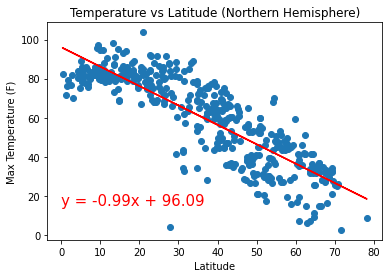

In [43]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Temperature vs Latitude (Northern Hemisphere)", "Latitude", "Max Temperature (F)", (0, 15))


The r-squared value is: 0.6334545827598633


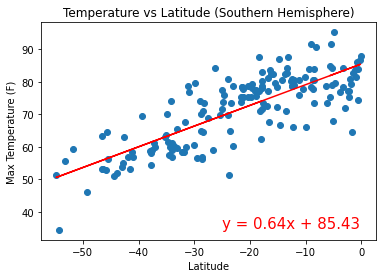

In [47]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Temperature vs Latitude (Southern Hemisphere)", "Latitude", "Max Temperature (F)", (-25, 35))

**Discussion about the linear relationship:** Temperature and Latitude do seem to be related. Both have moderate to strong R-squared values. Based on the data, it does appear temperature and latitude are related: the closer the latitude value to zero, the higher the temperature will be.

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.03624213512117499


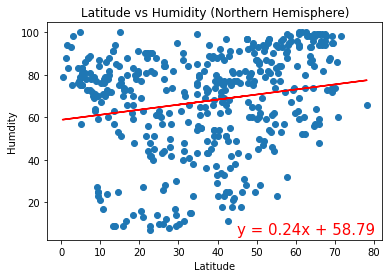

In [58]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude vs Humidity (Northern Hemisphere)", "Latitude", "Humdity", (45, 5))

The r-squared value is: 0.059596775462195786


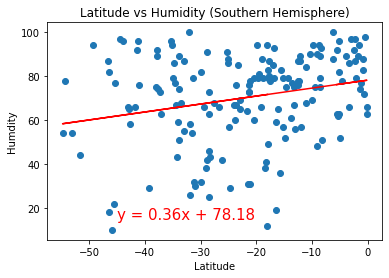

In [59]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude vs Humidity (Southern Hemisphere)", "Latitude", "Humdity", (-45, 15))

**Discussion about the linear relationship:** Latitude and Humidity do not seem to be related. Both R-squared values are close to zero, which suggests no relationship. A look at each scatter plot shows the line does not pass through many of the data points.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.028927320667971


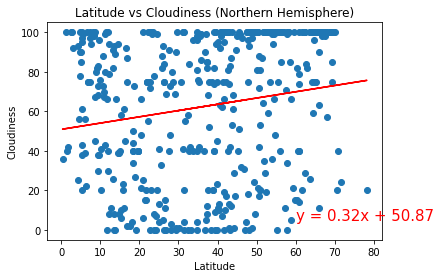

In [64]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude vs Cloudiness (Northern Hemisphere)", "Latitude", "Cloudiness", (60, 5))

The r-squared value is: 0.028285899424290727


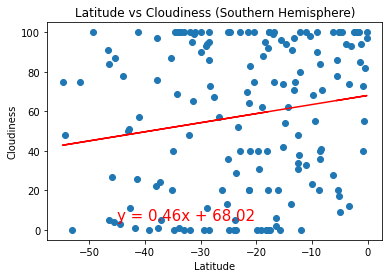

In [62]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude vs Cloudiness (Southern Hemisphere)", "Latitude", "Cloudiness", (-45, 5))

**Discussion about the linear relationship:** Much like humidity, the data for latitude vs cloudiness is very scatted and does not have a strong R value. There appears to be no relation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 1.6064354616397977e-05


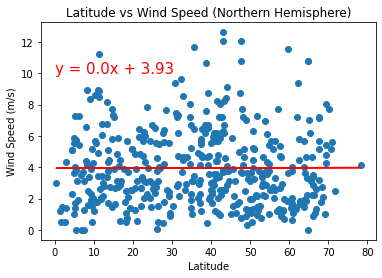

In [66]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude vs Wind Speed (Northern Hemisphere)", "Latitude", "Wind Speed (m/s)", (0, 10))

The r-squared value is: 0.10251031566592707


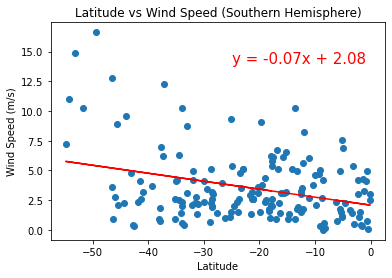

In [71]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude vs Wind Speed (Southern Hemisphere)", "Latitude", "Wind Speed (m/s)", (-25, 14))

**Discussion about the linear relationship:** There appears to be no coorealtion between latitude and wind speed in either hemisphere. The R values are small for both sets and the line does not run through the majority of the data points.